<a href="https://colab.research.google.com/github/giacomocolonetti/giacomocolonetti/blob/main/me.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lorum Ipsum Dolor

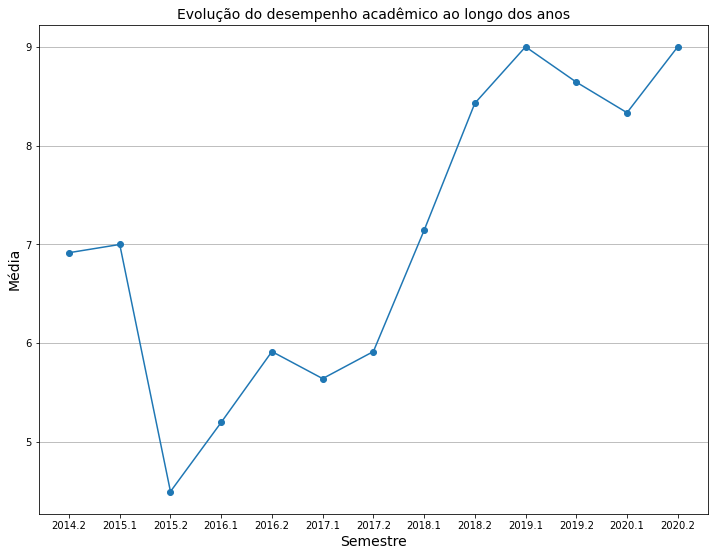

In [221]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_json('https://raw.githubusercontent.com/giacomocolonetti/giacomocolonetti/main/historico.json')
df['Nota'] = pd.to_numeric(df['Nota'], errors='coerce')
df['Avg'] = df.groupby('Semestre')['Nota'].transform('mean')
df['Semestre'] = df['Semestre'].astype(str)
df.dropna(subset=['Nota'], inplace=True)

avg_df = df[['Semestre', 'Avg']].copy(deep=True)
avg_df['Semestre'] = avg_df['Semestre'].astype(str)
avg_df.drop_duplicates(subset='Semestre', inplace=True)

fig, ax1 = plt.subplots()
fig.set_size_inches(12,9)

font1 = {'size':'14'}
ax1.set_xlabel('Semestre', fontdict = font1)
ax1.set_ylabel('Média', fontdict = font1)
ax1.set_title('Evolução do desempenho acadêmico ao longo dos anos', fontdict = font1)

ax1.grid(axis = 'y')
ax1.plot(avg_df['Semestre'], avg_df['Avg'], marker = 'o')
plt.show()

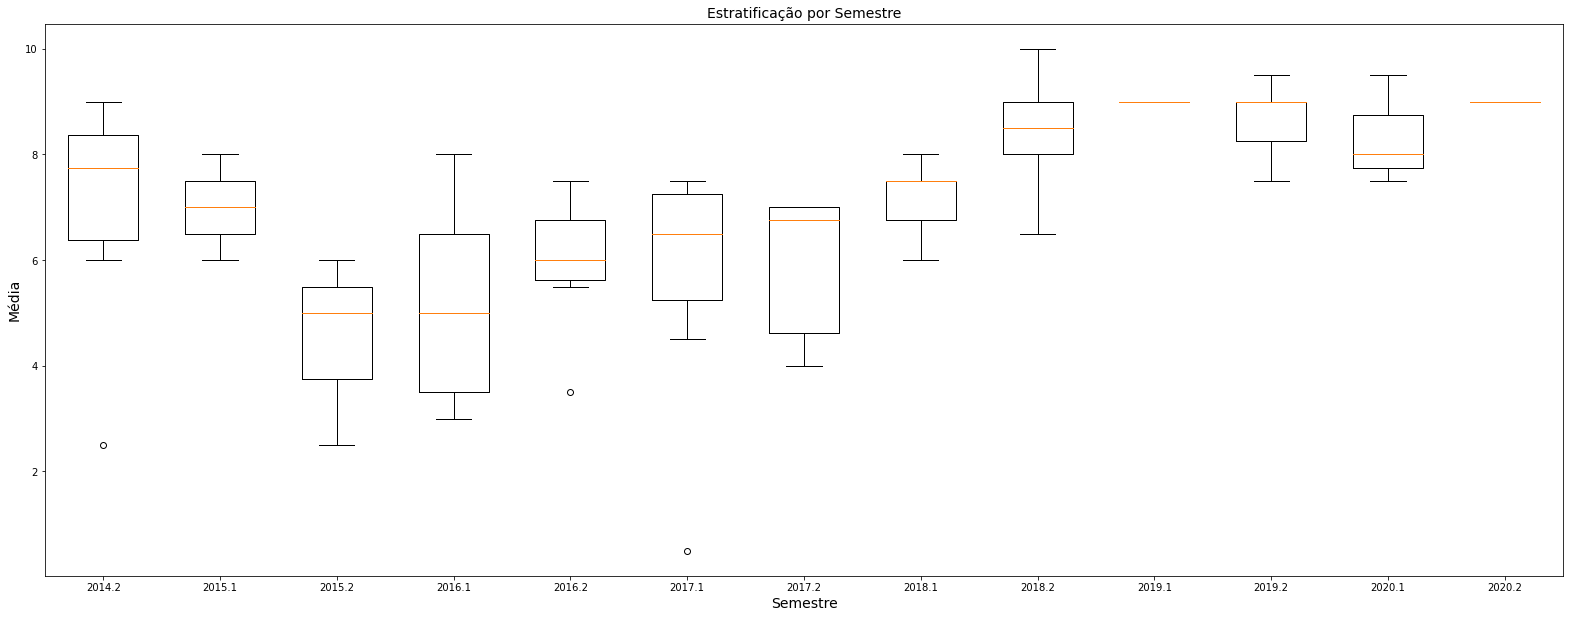

In [222]:
fig2, ax2 = plt.subplots()
fig2.tight_layout()
fig2.set_size_inches(24,9)

ax2.set_xlabel('Semestre', fontdict = font1)
ax2.set_ylabel('Média', fontdict = font1)
ax2.set_title('Estratificação por Semestre', fontdict = font1)

semestres = df['Semestre'].unique().tolist()
df_dict = {elem : pd.DataFrame for elem in semestres}

for key in df_dict.keys():
  df_dict[key] = df[:][df['Semestre'] == key]

ax2.set_xticklabels(semestres)
for semester in semestres:
  ax2.boxplot(df_dict[semester]['Nota'], positions=[semestres.index(semester)], widths=0.6)

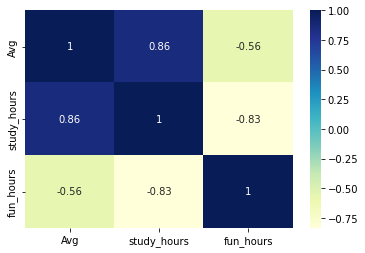

In [223]:
from math import exp
from random import random
import seaborn as sns

study_hours = [random() for i in range(5)]
study_hours += [(1-exp(-0.1*x))*36 for x in range(1, 9)]
fun_hours = [(exp(-0.22*x))*8 for x in range(13)]

avg_df['study_hours'] = study_hours
avg_df['fun_hours'] = fun_hours

corr = avg_df.corr()
sns.heatmap(corr, xticklabels= corr.columns.values, yticklabels= corr.columns.values, cmap= 'YlGnBu', annot=True)

Processo
*   Massa por Colaborador
*   Ocupação por Colaborador
*   Massa por kWh Consumido
*   Aproveitamento Percentual da Capacidade de Carga (kg/kg)
*   Massa por Hora Trabalhada
*   Demanda por Segmento de Produto

Geral
*   Dias de Atraso
*   Ordens de Produção em Atraso



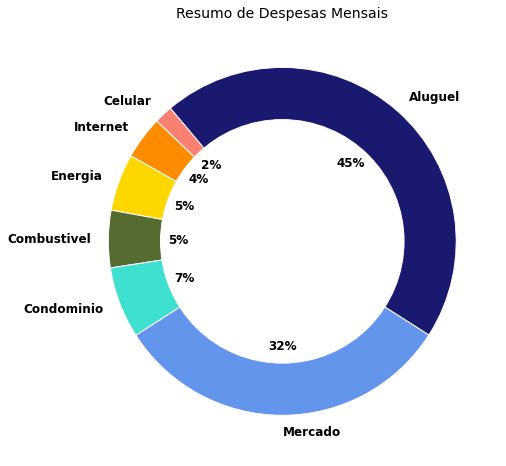

In [224]:
expenses = {'Aluguel': 0.45152722443559096, 'Condominio': 0.06640106241699867, 'Internet': 0.0398406374501992, 'Energia': 0.05312084993359894, 'Celular': 0.017264276228419653, 'Mercado': 0.3187250996015936, 'Combustivel': 0.05312084993359894}
expenses = dict(sorted(expenses.items(), key= lambda item: item[1]))

fig3, ax3 = plt.subplots()
fig3.set_size_inches(8,8)

inside_circle=plt.Circle((0,0), 0.7, color= 'white')
figure = plt.gcf()
figure.gca().add_artist(inside_circle)
colors = ['salmon', 'darkorange', 'gold', 'darkolivegreen', 'turquoise', 'cornflowerblue', 'midnightblue', 'indigo', 'crimson']

ax3.pie(expenses.values(), labels=expenses.keys(), autopct= '%1.0f%%', pctdistance=0.6, textprops= {'fontsize':12, 'weight':'bold'}, wedgeprops= {'linewidth':1, 'edgecolor':'white'}, startangle=130, colors= colors)
ax3.set_title('Resumo de Despesas Mensais', fontdict= font1)
plt.show()